## Chapter 2. Bayesian Inference (베이지안 추론)

### text: Statistical Rethinking 
#### Chapter 2. Small World and Large World

In [1]:
%matplotlib inline
#import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#from ipywidgets import interact

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, ColumnDataSource
import bokeh.palettes as bkpal

output_notebook()

## 4 Marbles in a Bag
### The marbles come in TWO COLORS: Blue or White
#### marble 한개를 꺼내서 본 후 주머니에 다시 집어 넣는다. (3회 반복)

<br><br>
<img style="float: left;" src="pic/01_01.png"  width="750">

<br><br>
<img style="float: left;" src="pic/01_02.png"  width="750">

<br><br>
<img style="float: left;" src="pic/01_03.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_04.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_05.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_06.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_07.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_08.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_09.png"  width="650">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_10.png"  width="650">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_11.png"  width="750">

<br><br><br><br>
Bag 으로부터 또 한번 marble을 꺼내어(4번째 꺼낸 마블) 관측하였더니 Blue Marble 었다.
이 상황을 계산하는 방법은 2가지가 있다.
1. 🔵🔵⚪🔵 를 처음부터 다시 계산하는 방법
2. 세번째 마블까지의 결과를 바탕으로 네번째 관측치로 업데이트 하는 방법

세번째 마블까지의 counts 를 prior counts 라 부르자.  prior는 previous를 의미한다.

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_12.png"  width="750">

위와 같은 업데이트 방법은   
(1) 하나의 conjecture에 대하여, 이전 관측치 $D_{prior}$가 관측될 수 있는 경우의 수는 $W_{prior}$ 만큼의 방법이 있음을 알고 있다.  
(2) 동일한 conjecture에 대하여, 새로운 관측치(즉, 추가 과측치) $D_{new}$ 가 관측될 수 있는 경우의 수는 $W_{new}$ 만큼의 방법이 있음을 알아낸다.  
(3) $D_{prior}$ 와 $D_{new}$ 가 연달아 관측될 때 만들어 내는 방법의 수는 $W_{prior}$ × $W_{new}$ 이다.

<br><br>

예를 들면, 위 그림에서 conjecture가 [🔵🔵⚪⚪]라 하면, $D_{prior}$  = [🔵⚪🔵] 를 관측하는 경우의 수는 $W_{prior}$ = 8 가지 방법이 있다. 

새로운 관측치 $D_{new}$ = [🔵]를 관측하게 되는 경우의 수는 $W_{new}$ = 2 가지 방법이 있다.  

따라서, $D_{prior}$ 와 $D_{new}$ 를 모두 관측하는 방법의 수는 8 × 2 = 16 가지 방법이 있게된다.

그런데, 경우의 수를 구할 때, 왜 곱하지 ?

앞의 부채살 모양의 그림들에서 보았듯이, 새로운 관측치가 추가되면 기존의 관측치 바깥쪽으로 한 겹의 원둘레가 더 생기며, 이들로 가는 길은 기존의 안쪽 길을 통과한 후에 갈 수 있기 때문이다. 따라서, 모든 길(path)의 수는 (안쪽 원에 있는 path의 수) x (바깥쪽 원에 있는 path의 수)가 된다.

이 예에서, prior data와 new data가 동일한 타입이었다. (즉 주머니에서 꺼낸 Marble)

그러나, 일반적으로, prior data와 new data가 다른 타입일 수 있다.

<br><br><br>
예를 들어, marble 공장으로부터 누군가가 blue marbles은 드물어서 다음과 같은 비율로 주머니를 만든다고 당신에게 말했다고 하자.
 [🔵🔵🔵⚪] 를 담는 주머니 하나를 만들 때,  [🔵🔵⚪⚪] 주머니 두개를 만들며,  [🔵⚪⚪⚪] 주머니 세개를 만든다.   
 그리고 모든 주머니에는 적어도 한 개의 🔵 와 한개의 ⚪ 가 들어있다.  
 
 이제 이 정보를 이용하여, 업데이트 하자

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_13.png"  width="750">

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_14.png"  width="750">

Now the conjecture  [🔵🔵⚪⚪] is most plausible, but barely better than  [🔵🔵🔵⚪].   
Is there a threshold difference in these counts at which we can safely decide that one of the conjectures  
is the correct one?   
You’ll spend the next chapter exploring that question.

Rethinking: Original ignorance. Which assumption should we use, when there is no previous information about the conjectures? The most common solution is to assign an equal number of ways that
each conjecture could be correct, before seeing any data. This is sometimes known as the principle
of indifference: When there is no reason to say that one conjecture is more plausible than another,
weigh all of the conjectures equally. This book does not use nor endorse “ignorance” priors. As we’ll
see in later chapters, the structure of the model and the scientific context always provide information
that allows us to do better than ignorance

<br><br><br><br>

## 2.1.3 From counts to Probability


경우의 수를 사용하는 것은 어려움이 발생한다.   
첫째, 중요한 것은 상대적인 값이다. 경우의 수 3, 8, 9는 그 자체로 정보를 포함하고 있지 않다. 
이 숫자는 쉽게, 30, 80, 90으로 바뀔 수 있다. 그러더라도 의미는 동일하다.  
둘째, 관측치 자료의 크기가 더 커져가면, 경우의 수는 순식간에 매우 큰 수가 되어, 다루기 어려워진다.  
위 예에서, 관측치기가 10개만 되어도, 모든 가능한 경우의 수는 100만을 넘어선다. (4^10=1048576)  

따라서, 경우의 수를 사용하는 것은 실질적이지 못한다. 

다행히, 이러한 모든 경우의 수를 압축하여 나타내는 수학적인 방법이 있다.

plausibility(개연성): (네이버 사전) 절대적으로 확실하지 않으나 아마 그럴 것이라고 생각되는 성질

🔵⚪🔵 을 본 후의  [🔵⚪⚪⚪]의  plausibility   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∝$  
[🔵⚪⚪⚪] 가 🔵⚪🔵 을 만드는 방법의 수   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;X  
[🔵⚪⚪⚪]의 prior plausibility  
                  

<br><br><br>
여기에서 $∝$는 비례한다(proportional to)는 의미이다.

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_15.png"  width="750">

#### Code 2.1

In [2]:
ways = np.array([0, 3, 8, 9, 0])
ways / ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

각 주머니에 있는 blue marble의 비율을 $p$ 라고 하면, conjecture 대신에 $p$를 사용하여 다음과 같이 표현할 수 있다.

plausibility of $p$ after $D_{new}$ &nbsp;&nbsp;&nbsp; ∝ &nbsp;&nbsp;&nbsp; ways $p$ can produce $D_{new}$ &nbsp;&nbsp; ×&nbsp;&nbsp; prior plausibility of $p$

plausibility of $p$ after $D_{new}$ &nbsp;&nbsp;&nbsp; = &nbsp;&nbsp;&nbsp; (ways $p$ can produce $D_{new}$ &nbsp;&nbsp; ×&nbsp;&nbsp; prior plausibility of $p$) / (sum of products)

<br><br><br><br><br><br>
<img style="float: left;" src="pic/01_16.png"  width="750">

These **plausibilities** are also **probabilities**—they are non-negative (zero or positive) real
numbers that sum to one.   
And all of the mathematical things you can do with probabilities
you can also do with these values.   
Specifically, each piece of the calculation has a direct
partner in applied probability theory.   
These partners have stereotyped names, so it’s worth
learning them, as you’ll see them again and again.

* A conjectured proportion of blue marbles, p, is usually called a **parameter** value.  
 It’s just a way of indexing possible explanations of the data.
* **The relative number of ways that a value p can produce the data is usually called
a likelihood**.   
It is derived by enumerating all the possible data sequences that
could have happened and then eliminating those sequences inconsistent with the
data.
* The prior plausibility of any specific p is usually called the **prior probability**.
* The new, updated plausibility of any specific p is usually called the **posterior
probability**.

<br><br><br>

## 2.2 Building a Model

<br><br><br>
<img style="float: left;" src="pic/01_19.png"  width="450">

<br><br><br>
<img style="float: left;" src="pic/01_20.png"  width="450">

<br><br><br>
## 2.2.2 Bayesian Updating

<br><br><br>
<img style="float: left;" src="pic/01_22.png"  width="350">

<br><br><br>
<img style="float: left;" src="pic/01_23.png"  width="350">

<br><br><br>
<img style="float: left;" src="pic/01_24.png"  width="500">

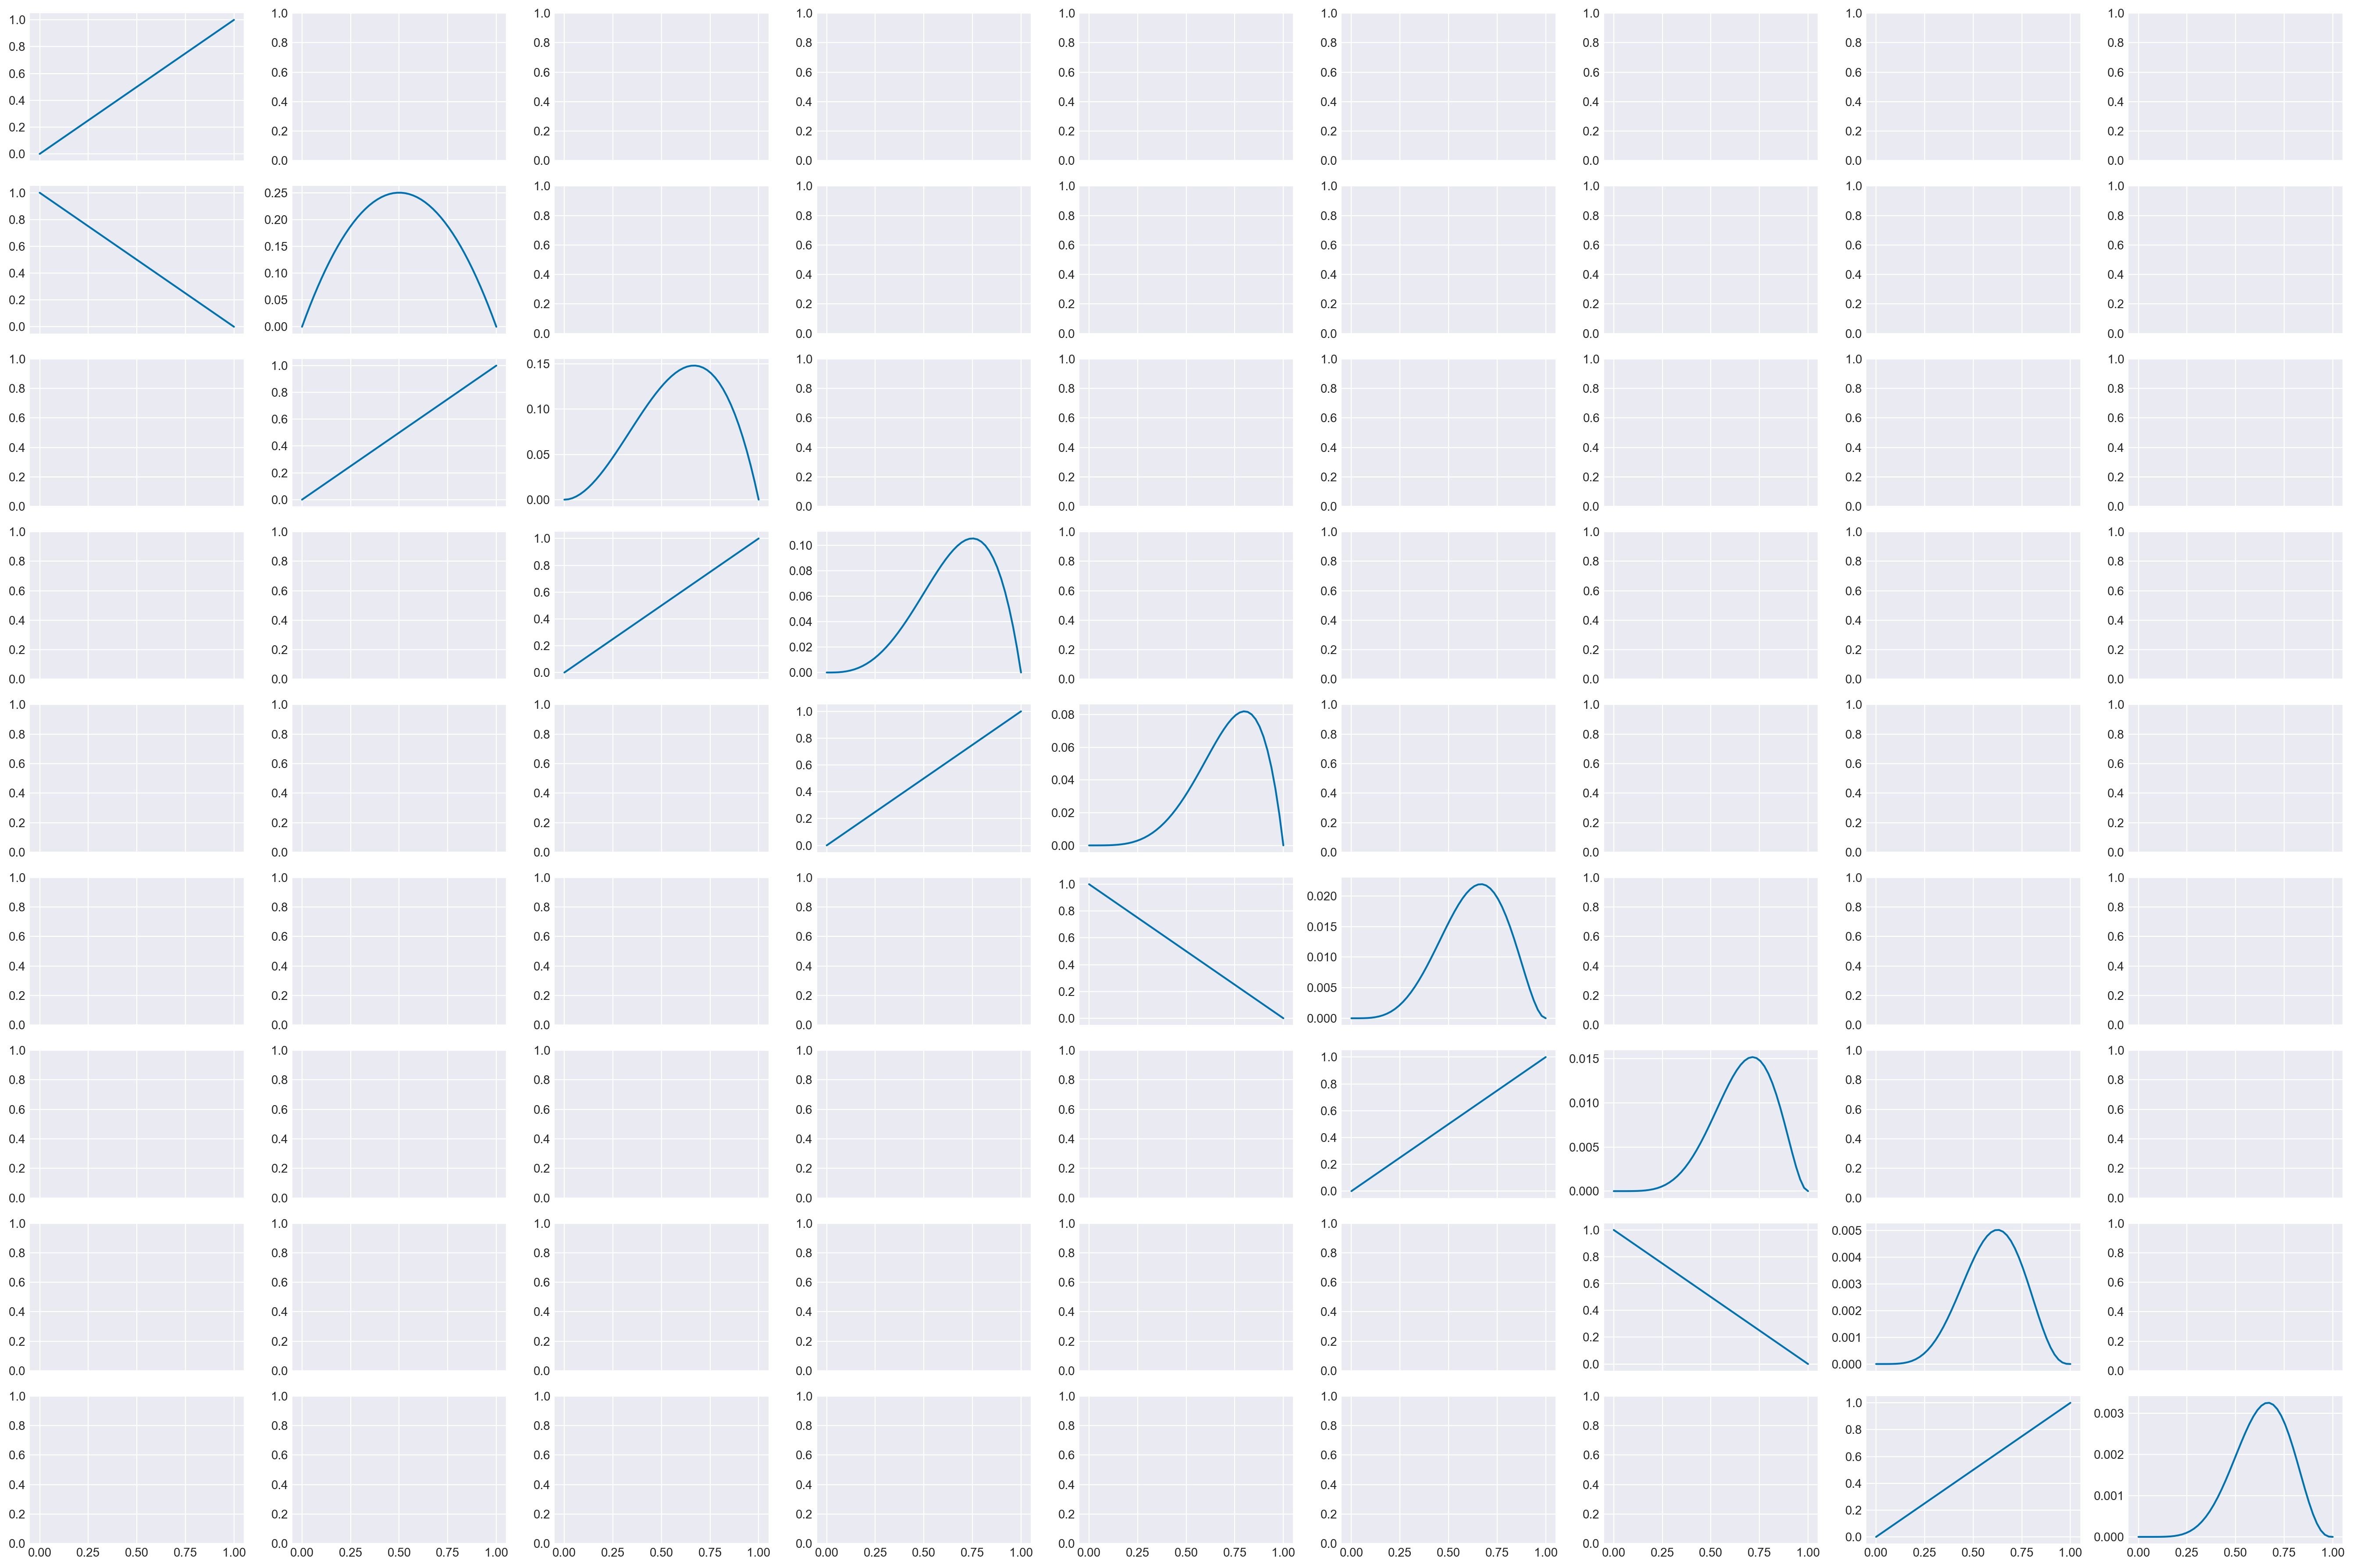

In [3]:
y = np.asarray([1, 0, 1, 1, 1, 0, 1, 0, 1])
pv = np.linspace(0., 1., 50)

_, ax = plt.subplots(len(y), len(y), figsize=(len(y)*3, len(y)*2), sharex=True)
j = 0
for i, y_ in enumerate(y):
    likei = stats.bernoulli.pmf(y_, pv) # 아래 셀 참고
    ax[i, j].plot(pv, likei)
    if i>0:
        like_ *= likei
        ax[i, j+1].plot(pv, like_)
        j+=1
    else:
        like_ = likei
    
plt.tight_layout();

<img style="float: left;" src="pic/01_23_2.png"  width="650">

<br><br><br>
<img style="float: left;" src="pic/01_25.png"  width="650">

<br><br><br>
<img style="float: left;" src="pic/01_26.png"  width="650">

<br><br><br>
<img style="float: left;" src="pic/01_27.png"  width="750">

<br><br><br>
<img style="float: left;" src="pic/01_28.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_29.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_30.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_31.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_32.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_33.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_34.png"  width="550">

#### Code 2.2

$$Pr(w \mid n, p) =  \frac{n!}{w!(n − w)!} p^w (1 − p)^{n−w}$$


The probability of observing six W’s in nine tosses—under a value of p=0.5

In [ ]:
stats.binom.pmf(6, n=9, p=0.5)

<br><br><br>
<img style="float: left;" src="pic/01_35.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_36.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_37.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_38.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_39.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_40.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_41.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_42.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_43.png"  width="550">

<br><br><br>
<img style="float: left;" src="pic/01_44.png"  width="350">

<br><br><br>
<img style="float: left;" src="pic/01_45.png"  width="350">

<br><br><br>
<img style="float: left;" src="pic/01_47.png"  width="350">

<br><br><br>
<img style="float: left;" src="pic/01_48.png"  width="350">

<br><br><br>
<img style="float: left;" src="pic/01_49.png"  width="350">

#### Code 2.3 and 2.5

Computing the posterior using a grid approximation.

In the book the following code is not inside a function, but this way is easier to play with different parameters

In [ ]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

#### Code 2.3

In [ ]:
import numpy as np
points = 5
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

In [ ]:
import numpy as np
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# 이하 생략

#### Code 2.6

Computing the posterior using the quadratic approximation

In [ ]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

In [ ]:
norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
pi

#### Code 2.7

In [ ]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title('n = {}'.format(n), fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

In [ ]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__))